### **<span style="color:#357EC7;font-size:200%"><center>🏡Street View Housing Number Digits Recognition🏡</center></span>**
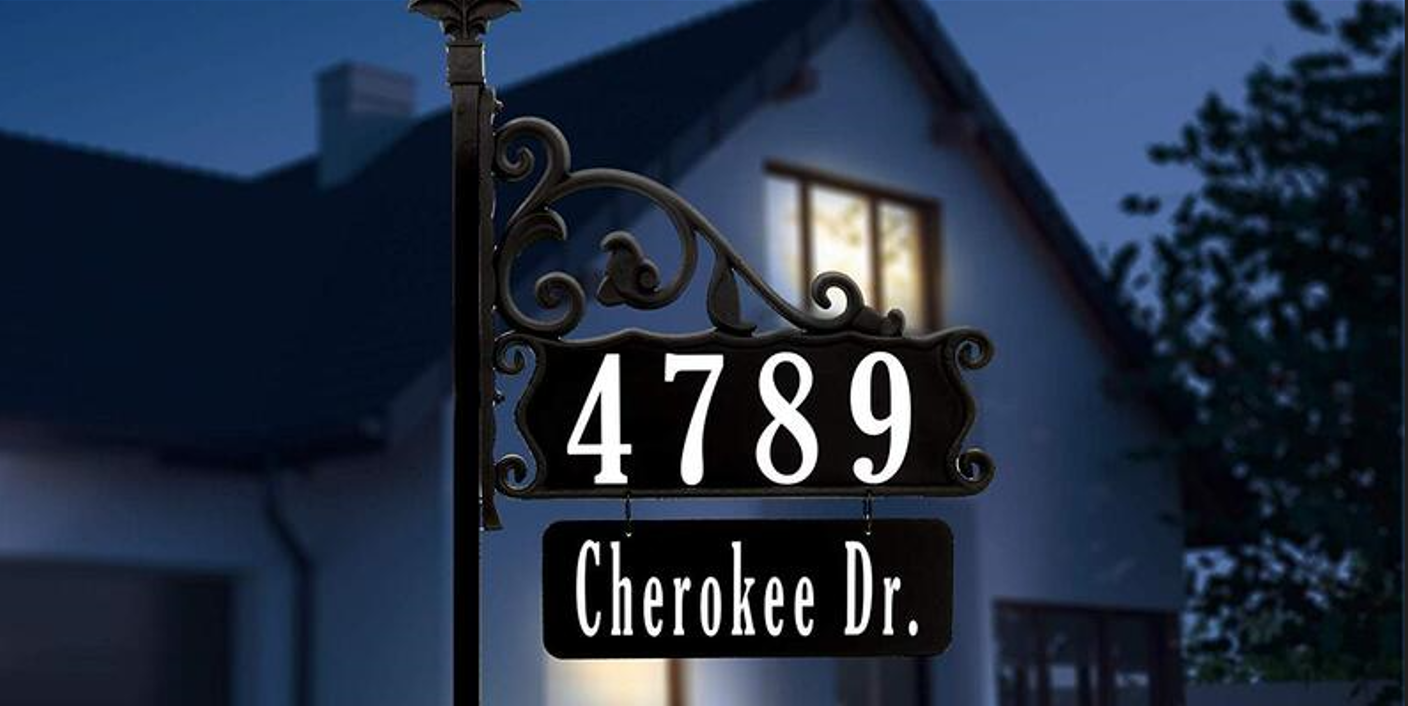

# **<a id="Content" style="color:#357EC7;">Table of Content</a>**
* [**<span style="color:#357EC7;">1. Problem Statement 👀</span>**](#1)  
* [**<span style="color:#357EC7;">2. Dataset Load and Visualizaton</span>**](#2)  
* [**<span style="color:#357EC7;">3. Pre-processing</span>**](#3)
> *  [**<span style="color:#FF7F50;">`Feature Scalling`</span>**](#3.1) 

* [**<span style="color:#357EC7;">4. Build a Model </span>**](#4) 
> *  [**<span style="color:#FF7F50;">`Model`</span>**](#4.0) 
> *  [**<span style="color:#FF7F50;">`MOdel1`</span>**](#4.1)
> *  [**<span style="color:#FF7F50;">`Model2`</span>**](#4.2)
> *  [**<span style="color:#FF7F50;">`Model3`</span>**](#4.3)

* [**<span style="color:#357EC7;">5. Accuracy and Loss Visualization</span>**](#5) 

* [**<span style="color:#357EC7;">6. Performance Evaluation and Visualization</span>**](#6) 

* [**<span style="color:#357EC7;">7. Image with Actual Label and Predicted Label</span>**](#7) 

* [**<span style="color:#357EC7;">8. References</span>**](#8) 

# **<span id="1" style="color:#357EC7;">1. Problem Statement 👀</span>** 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding:2px">GO to Table of Content</span>**](#Content)

## <div style="text-align: justify;"> **<span style="color:#357EC7;">Context</span>**

**<span style="color:#357EC7;"> Recognizing things in their natural settings is one of the most fascinating challenges in the field of deep 
learning. </span>**

**<div style="text-align: justify;"> <span style="color:#357EC7;">
The `SVHN` dataset includes approximately</span> <span style="color:#FF00FF;">600,000 digits </span> <span style="color:#023e8a;">that have been identified and were `clipped` from `street-level photographs`. It has been put to use in the`neural networks` that </span> <span style="color:#FF00FF;">Google</span><span style="color:#357EC7;">has developed in order to</span> <span style="color:#FF00FF;">enhance the quality of maps</span>  <span style="color:#357EC7;;">by automatically`trancribing address numbers` from individual pixel clusters. The `combination` of the `transcribed number` and the `known street address` makes it easier to locate the building that the number represents.</span> </div>**

## **<span style="color:#357EC7;">Objective</span>**

**<span style="color:#357EC7;">Develop a </span>** **<span style="color:#FF00FF;">CNN model</span>** **<span style="color:#357EC7;">That is capable of `recognition the digit` that are shown in the photos</span>**

# **<span style="colior:#357EC7;"> Dataset </span>**

**<span style="color: #357EC7;"> To reduce the amount of `time spent computing`, we will only utilize a portion of the whole original data.
`The dataset is supplied` to you in the form of a `.h5 file`. All of the `fundamental` preprocessing procedures
have been completed.</span>**

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam, SGD
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# **<span id="2" style="color: #357EC7;">2. Dataset Load and Visualization </span>**

**<div style="text-align: justify;"> <span style="color:#357EC7;">We will make use of the<span style="color:#357EC7;">`SVHN dataset`</span> for the `capstone project`. As the numbers appear in the midst of photos of natural scenes, this image dataset which includes over <span style="color:#357EC7;">`600,000 digitized images`</span> overall is more challenging than `MNIST. House numbers in Google Street View pictures` are used to <span style="color:#357EC7"> calculate SVHN. </span></div>**

In [3]:
# Loading Dataset 
file_name = '../input/street-view-housing-number-digit-recognition/SVHN_single_grey1.h5'

# TO create HDF file object
df = h5py.File(file_name,'r')

In [4]:
# converting the images from ..input/>.h5 file to numpy array
data = np.array(df)
test_x = np.array(df['X_test'])
train_x = np.array(df['X_train'])
val_x = np.array(df['X_val'])

test_y = np.array(df['y_test'])
train_y = np.array(df['y_train'])
val_y = np.array(df['y_val'])

In [5]:
# Cheking type of converted array
print(type(test_x))
print(type(train_x))
print(type(val_x))

print(type(test_y))
print(type(train_y))
print(type(val_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# **<span id="2" style="color: #357EC7;">2. Dataset Visualization </span>**

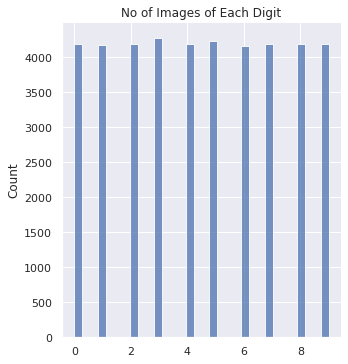

In [6]:
sns.set_theme(style="darkgrid")
sns.displot(data, x=train_y, facet_kws=dict(margin_titles=True),)


plt.title("No of Images of Each Digit")
plt.show()

In [7]:
train_x[0].max()

130.4922

In [8]:
train_x[0].shape

(32, 32)

# **<span style="color: #357EC7;">Displaying first 10 images </span>**

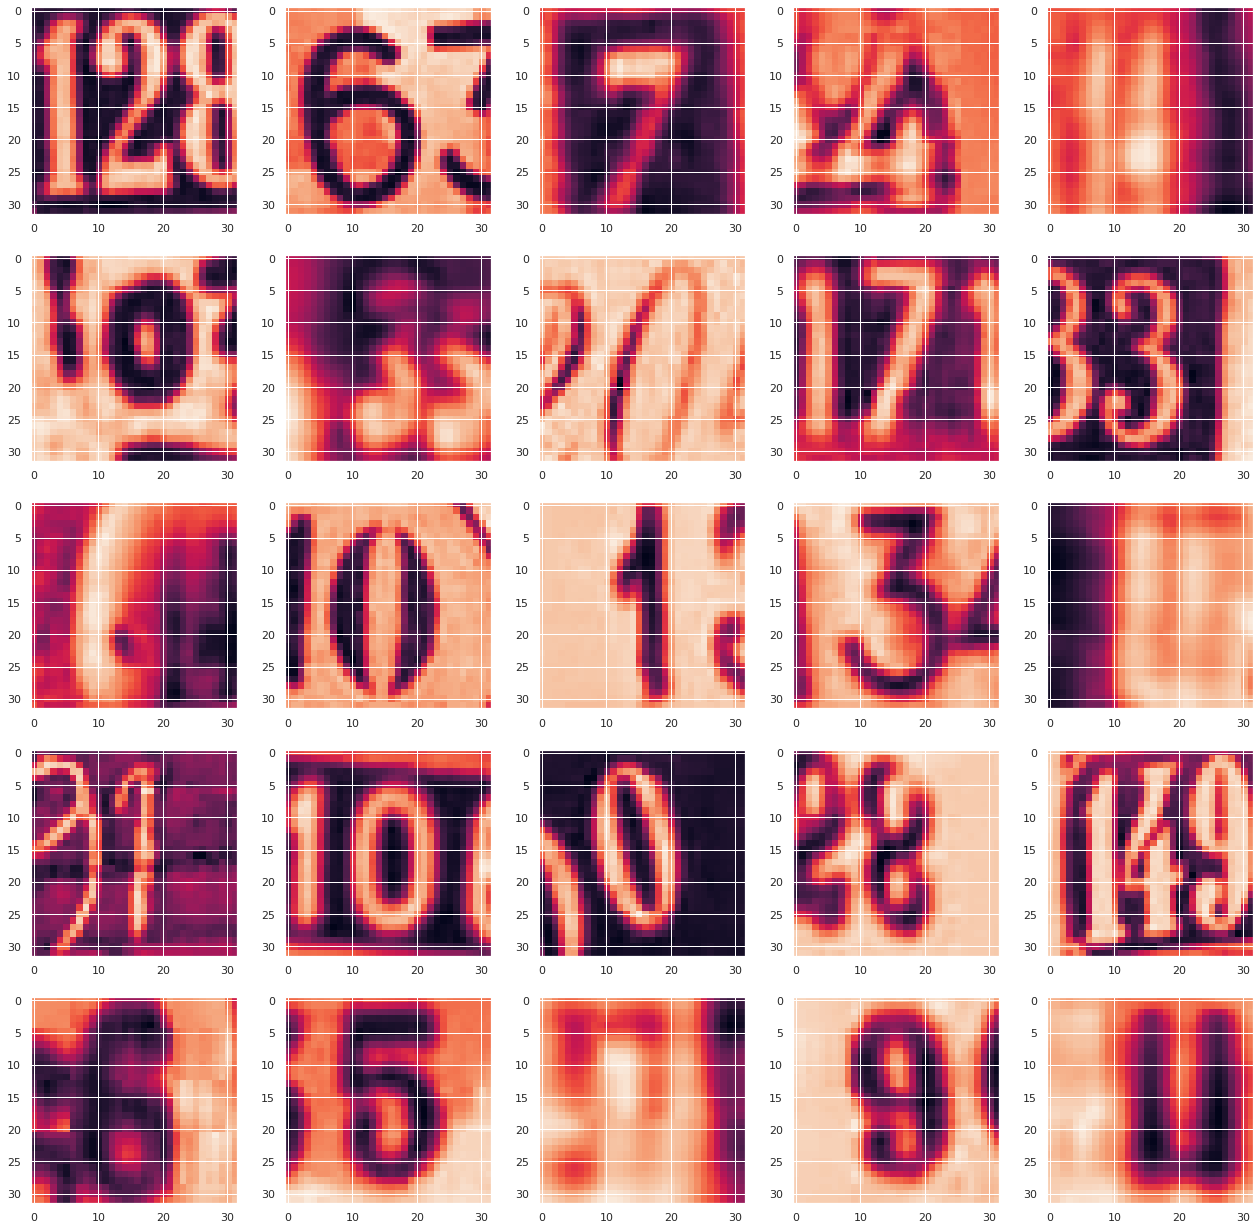

In [9]:
# Define a figure of size (22, 22)
fig=plt.figure(figsize=(22, 22))

# Define row and cols in the figure
rows, cols = 5, 5

# Display first four 10
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(train_x[j])
plt.show()

# **<span id="3" style="color: #357EC7;">3. Dataset Pre-processing </span>**

In [10]:
# Checking Lowest and Highest Pixel Value
print("Lowest Pixel Value:", train_x[0].min(),"Highest Pixel Value:", train_x[0].max())

Lowest Pixel Value: 14.5482 Highest Pixel Value: 130.4922


# **<span id="3.1" style="color: #357EC7;">3.1. Feature Scalling min-max scaler</span>**
**<div style="text-align: justify;"> <span style="color:#357EC7;">A way to normalize the input features/variables is the `Min-Max scaler`. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.</span></div>**




**<span style="color:#023e8a;"> `MinMaxScaler()` : Transform features by scaling each feature to a given range</span>**
$$
x_{scaled} = \frac {x - x_{min}}{x_{max} - x_{min}}
$$

In [11]:
# use min-max scaler to make max value as 1 and min valuer 0
scaler=MinMaxScaler()

train_x=scaler.fit_transform(train_x.reshape(-1,train_x.shape[-1])).reshape(train_x.shape)
test_x=scaler.transform(test_x.reshape(-1,test_x.shape[-1])).reshape(test_x.shape)
val_x=scaler.transform(val_x.reshape(-1,val_x.shape[-1])).reshape(val_x.shape)

# **<span id="4.0" style="color: #357EC7;">4.0. Model </span>**

In [12]:
model=Sequential()
#Input Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
# Hillden Layer 1
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#Hidden Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

2023-01-25 16:09:11.353821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:09:11.355114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:09:11.370885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:09:11.371926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 16:09:11.372959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# model.fit(train_x,train_y,epochs=20) 

# expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 32)

In [15]:
# Cheking the shape
train_x.shape

(42000, 32, 32)

In [16]:
# Afteradd 1 - Diemension To return the same data with a new shape

train_x = train_x.reshape(-1, 32, 32, 1)
val_x = val_x.reshape(-1, 32, 32, 1)
test_x = test_x.reshape(-1, 32, 32, 1)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [18]:
history = model.fit(train_x, train_y, 
          batch_size=86,
          validation_data=(val_x, val_y), 
          epochs=72)

2023-01-25 16:09:13.787260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/72


2023-01-25 16:09:14.830597: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


489/489 [==============================] - 7s 8ms/step - loss: 1.3476 - accuracy: 0.5487 - val_loss: 0.7416 - val_accuracy: 0.7807
Epoch 2/72
489/489 [==============================] - 3s 7ms/step - loss: 0.6195 - accuracy: 0.8231 - val_loss: 0.5356 - val_accuracy: 0.8515
Epoch 3/72
489/489 [==============================] - 3s 7ms/step - loss: 0.5093 - accuracy: 0.8573 - val_loss: 0.4629 - val_accuracy: 0.8706
Epoch 4/72
489/489 [==============================] - 3s 7ms/step - loss: 0.4473 - accuracy: 0.8741 - val_loss: 0.4080 - val_accuracy: 0.8870
Epoch 5/72
489/489 [==============================] - 3s 7ms/step - loss: 0.4019 - accuracy: 0.8863 - val_loss: 0.3694 - val_accuracy: 0.8996
Epoch 6/72
489/489 [==============================] - 3s 7ms/step - loss: 0.3663 - accuracy: 0.8960 - val_loss: 0.3489 - val_accuracy: 0.9024
Epoch 7/72
489/489 [==============================] - 3s 7ms/step - loss: 0.3412 - accuracy: 0.9026 - val_loss: 0.3269 - val_accuracy: 0.9072
Epoch 8/72
489/48

In [19]:
model.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0153 - accuracy: 0.9950


[0.01532819028943777, 0.9950476288795471]

In [20]:
model.evaluate(test_x, test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.9592 - accuracy: 0.9012


[0.9592396020889282, 0.9011666774749756]

In [21]:
model.evaluate(val_x, val_y)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.9669


[0.2985017001628876, 0.9668833613395691]

In [22]:
#Saving the model
model.save('CNN_Model.h5')

## **<span style="color:#357EC7">Overfitting Prevention</span>**

In [23]:
# # `EarlyStopping` is used based on `val_loss` to prevent overfitting
# # When a monitored metric0 has stopped improving, training is stopped

es = EarlyStopping(monitor='val_loss', mode='auto', patience=3, restore_best_weights=True, verbose=1)

# **<span id="4.1" style="color: #357EC7;">4.1   Model1 </span>**

In [24]:
#     Build a CNN with two convolutional + two max pooling layers, followed by two dense layers
#     out: model: the model we just built
model1 = Sequential()

model1.add(Conv2D(16,kernel_size=(3,3),
                 activation='relu',kernel_initializer = initializers.
                 RandomNormal(mean=0., stddev=0.1),input_shape=(32, 32,1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))


model1.add(Conv2D(16,kernel_size=(3,3),
                 activation='relu',kernel_initializer = initializers.
                 RandomNormal(mean=0., stddev=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))


model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

In [25]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [27]:
history = model1.fit(train_x, train_y,
          batch_size=35,
          validation_data=(val_x, val_y),
          callbacks=[es],
          epochs=25)

Epoch 1/25
1200/1200 [==============================] - 10s 8ms/step - loss: 1.8273 - accuracy: 0.3727 - val_loss: 0.8191 - val_accuracy: 0.7642
Epoch 2/25
1200/1200 [==============================] - 7s 6ms/step - loss: 1.0333 - accuracy: 0.6626 - val_loss: 0.8852 - val_accuracy: 0.7302
Epoch 3/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.8566 - accuracy: 0.7261 - val_loss: 0.5640 - val_accuracy: 0.8326
Epoch 4/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.7951 - accuracy: 0.7458 - val_loss: 0.4838 - val_accuracy: 0.8601
Epoch 5/25
1200/1200 [==============================] - 6s 5ms/step - loss: 0.7591 - accuracy: 0.7605 - val_loss: 0.4811 - val_accuracy: 0.8717
Epoch 6/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.7289 - accuracy: 0.7701 - val_loss: 0.4491 - val_accuracy: 0.8702
Epoch 7/25
1200/1200 [==============================] - 7s 6ms/step - loss: 0.7103 - accuracy: 0.7761 - val_loss: 0.5563 - val_accuracy

In [28]:
model1.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.4423 - accuracy: 0.8721


[0.4422531723976135, 0.8720714449882507]

In [29]:
model1.evaluate(test_x,test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.8657


[0.4651300013065338, 0.8657222390174866]

In [30]:
model1.evaluate(val_x,val_y)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4491 - accuracy: 0.8702


[0.4491165578365326, 0.8701666593551636]

In [31]:
model1.save('CNN_Model1.h5')

# **<span id="4.2" style="color: #357EC7;">4.2   Model2 </span>**

In [32]:
# building model2

#     Build an MLP model with a Flatten and four Dense layer

model2 = Sequential()

#Input Layer
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model2.add(MaxPooling2D((2,2)))

# Hillden Layer 1
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))

#Hidden Layer 2
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))


model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(64, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(32, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(10, activation='softmax'))

In [33]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [35]:
history=model2.fit(train_x,train_y,
        batch_size=62,
        validation_data=(val_x, val_y),
        callbacks=[es],
        epochs=25)

Epoch 1/25
678/678 [==============================] - 6s 8ms/step - loss: 1.1774 - accuracy: 0.6041 - val_loss: 0.5860 - val_accuracy: 0.8339
Epoch 2/25
678/678 [==============================] - 5s 7ms/step - loss: 0.5185 - accuracy: 0.8505 - val_loss: 0.4965 - val_accuracy: 0.8502
Epoch 3/25
678/678 [==============================] - 4s 7ms/step - loss: 0.4104 - accuracy: 0.8805 - val_loss: 0.3757 - val_accuracy: 0.8900
Epoch 4/25
678/678 [==============================] - 5s 7ms/step - loss: 0.3481 - accuracy: 0.8970 - val_loss: 0.3221 - val_accuracy: 0.9047
Epoch 5/25
678/678 [==============================] - 5s 7ms/step - loss: 0.3050 - accuracy: 0.9097 - val_loss: 0.2848 - val_accuracy: 0.9148
Epoch 6/25
678/678 [==============================] - 4s 7ms/step - loss: 0.2729 - accuracy: 0.9190 - val_loss: 0.2585 - val_accuracy: 0.9251
Epoch 7/25
678/678 [==============================] - 5s 8ms/step - loss: 0.2461 - accuracy: 0.9273 - val_loss: 0.2695 - val_accuracy: 0.9194
Epoch 



# **<span id="5" style="color: #357EC7;">5. Accuracy and Loss Visualization </span>**

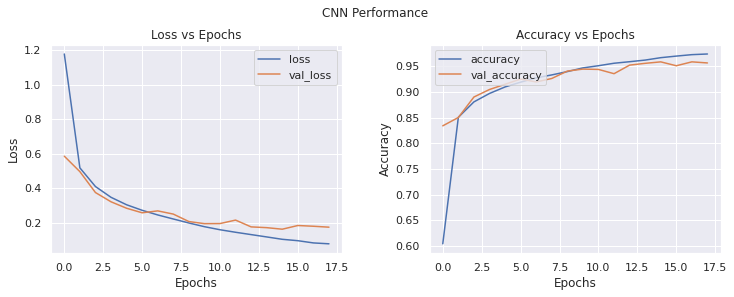

In [36]:
f, (f1, f2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

f1.plot(history.history['loss'])
f1.plot(history.history['val_loss'])
f1.set_title('Loss vs Epochs')
f1.set_xlabel('Epochs')
f1.set_ylabel('Loss')
l1=f1.legend(['loss','val_loss'], loc='upper right')


f2.plot(history.history['accuracy'])
f2.plot(history.history['val_accuracy'])
f2.set_title('Accuracy vs Epochs')
f2.set_xlabel('Epochs')
f2.set_ylabel('Accuracy')
l2=f2.legend(['accuracy','val_accuracy'], loc='upper left')

In [37]:
model2.evaluate(train_x, train_y)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0720 - accuracy: 0.9784


[0.07199312001466751, 0.9783809781074524]

In [38]:
model2.evaluate(test_x, test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.9122


[0.37711384892463684, 0.9121666550636292]

In [39]:
model2.evaluate(val_x, val_y)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1635 - accuracy: 0.9585


[0.16352947056293488, 0.9585166573524475]

In [40]:
model2.save('CNN_Model2.h5')

# **<span id="4.3" style="color: #357EC7;">4.3   Model3 </span>**

In [41]:
# Model3 with 2% dropout

#     Build an MLP model with a Flatten and two Dense layer
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [42]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                147520    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [44]:
history=model3.fit(train_x,train_y,
        batch_size=66,
        validation_data=(val_x,val_y),
        callbacks=[es],
        epochs=25)

Epoch 1/25
637/637 [==============================] - 5s 7ms/step - loss: 1.2733 - accuracy: 0.5789 - val_loss: 0.6249 - val_accuracy: 0.8258
Epoch 2/25
637/637 [==============================] - 4s 7ms/step - loss: 0.6389 - accuracy: 0.8118 - val_loss: 0.5155 - val_accuracy: 0.8588
Epoch 3/25
637/637 [==============================] - 4s 6ms/step - loss: 0.5481 - accuracy: 0.8359 - val_loss: 0.4328 - val_accuracy: 0.8736
Epoch 4/25
637/637 [==============================] - 4s 6ms/step - loss: 0.4957 - accuracy: 0.8504 - val_loss: 0.3995 - val_accuracy: 0.8835
Epoch 5/25
637/637 [==============================] - 5s 7ms/step - loss: 0.4572 - accuracy: 0.8642 - val_loss: 0.3699 - val_accuracy: 0.8924
Epoch 6/25
637/637 [==============================] - 5s 7ms/step - loss: 0.4276 - accuracy: 0.8725 - val_loss: 0.3463 - val_accuracy: 0.8976
Epoch 7/25
637/637 [==============================] - 4s 6ms/step - loss: 0.4074 - accuracy: 0.8775 - val_loss: 0.3415 - val_accuracy: 0.8998
Epoch 

In [45]:
model3.evaluate(train_x,train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.1386 - accuracy: 0.9604


[0.13862138986587524, 0.9603809714317322]

In [46]:
model3.evaluate(test_x,test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8964


[0.40260210633277893, 0.8963888883590698]

In [47]:
model3.evaluate(val_x,val_y)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2178 - accuracy: 0.9412


[0.21781569719314575, 0.94118332862854]

In [48]:
model3.save('CNN_Model3.h5')

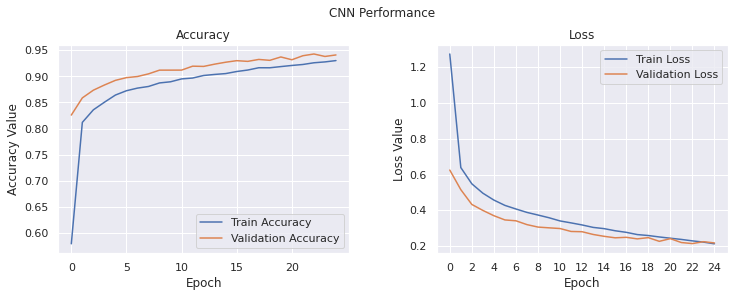

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,25))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 25, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 25, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [50]:
# Load the saved Model
saved_model = load_model('CNN_Model.h5')

## **<span id="6" style="color:#357EC7;">6. Performance Evaluation and Visualization</span>**

In [51]:
# Cheking if model is working
saved_model.evaluate(train_x, train_y)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0153 - accuracy: 0.9950


[0.01532819028943777, 0.9950476288795471]

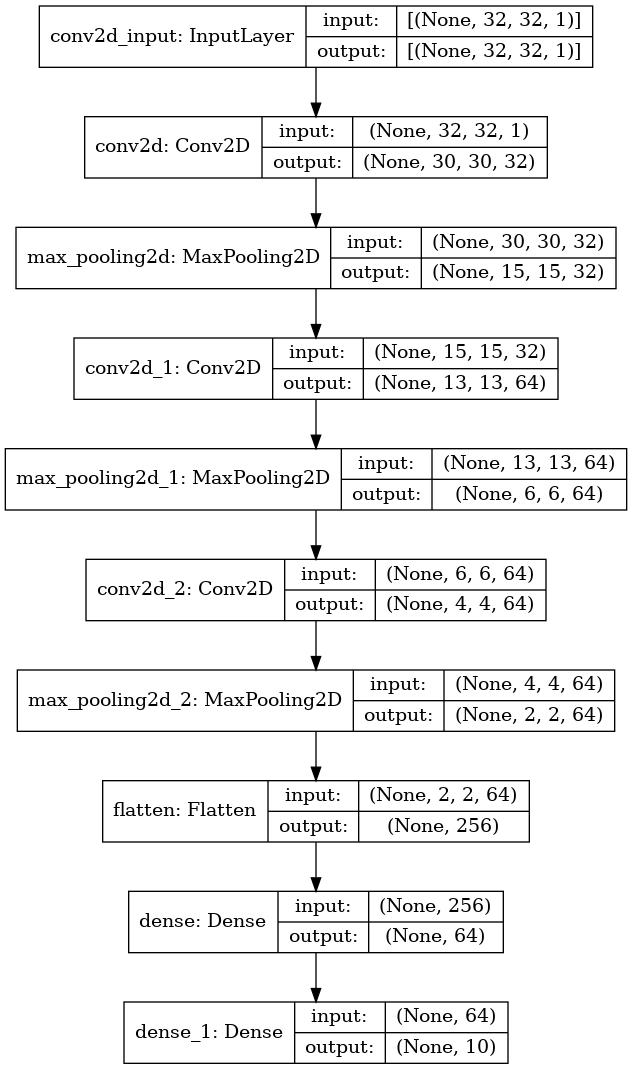

In [52]:
#Show Model Architecture
plot_model(saved_model,'CNN_Model.h5.jpg',show_shapes=True,show_layer_names=True)

In [53]:
# Getting model predictions
test_predictions = saved_model.predict(test_x)
preds = np.argmax(test_predictions, axis=1)

In [54]:
# Showing Classification Report
# To build a  report on the classification metrics
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1814
           1       0.90      0.89      0.90      1828
           2       0.94      0.90      0.92      1803
           3       0.85      0.91      0.88      1719
           4       0.93      0.91      0.92      1812
           5       0.90      0.89      0.90      1768
           6       0.93      0.87      0.90      1832
           7       0.93      0.92      0.92      1808
           8       0.89      0.88      0.89      1812
           9       0.90      0.88      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



## **<span id="7" style="color:#357EC7;">7. Image with Actual Label and Predicted Label</span>**

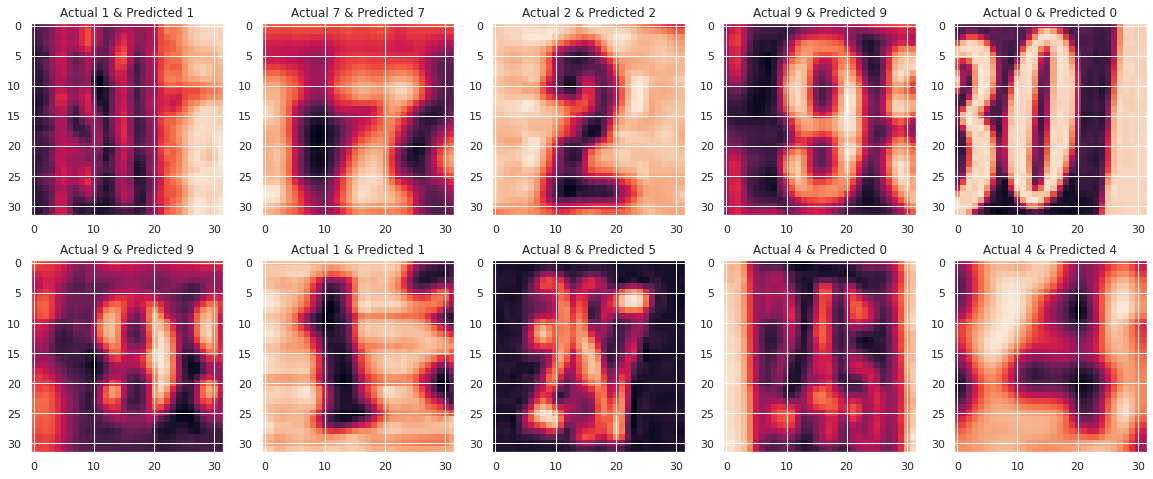

In [55]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib
y = test_y

fig = plt.figure(figsize=(20,8))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y[0],preds[0]))  ## Label 
axes[0,0].imshow(test_x[0]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y[1],preds[1]))
axes[0,1].imshow(test_x[1])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y[2],preds[2]))
axes[0,2].imshow(test_x[2])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y[3],preds[3]))
axes[0,3].imshow(test_x[3])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y[4],preds[4]))
axes[0,4].imshow(test_x[4])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y[5],preds[5]))
axes[1,0].imshow(test_x[5])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y[6],preds[6]))
axes[1,1].imshow(test_x[6])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y[7],preds[7]))
axes[1,2].imshow(test_x[7])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y[8],preds[8]))
axes[1,3].imshow(test_x[8])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y[9],preds[9]))
axes[1,4].imshow(test_x[9])
plt.show()

# **<span id="8" style="color:#357EC7;">8. References 📌</span>**
**<span style="color:#357EC7;"> Some of the notebooks used for preparing this notebook  </span>**
<ul>
    <li><a href="https://www.kaggle.com/code/ruhul77/emotion-recognition"> Emotion_Recognition 🧠</a></li>
    <li><a href="https://www.kaggle.com/code/ruhul77/traffic-sign-recognition-and-classfication-cnn"> Traffic_Sign_Recognition_And__Classfication_CNN 🧠</a></li>
    <li><a href="https://www.kaggle.com/code/ruhul77/market-basket-analysis-up-selling-cross-selling"> Market Basket Analysis Up Selling Cross Selling 🧠</a></li>
    <li><a href="https://www.kaggle.com/code/vanguarde/nbme-eda"> NBME EDA 🩺</a></li>
</ul>

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding:2px">GO to Table of Content</span>**](#Content)

### **<center><span style="color:#FEF1FE;background-color:#357EC7;border-radius: 3px;padding: 3px">Thank You For Reading! Please do not forget to give your insightful feedback.</span></center>**